## 02-1. 훈련세트와 테스트 세트 

## 지도학습과 비지도 학습의 차이를 배웁니다. 훈련세트와 테스트 세트로 데이터를 나눠서 학습을 합니다. 

### 용어정리 

**지도학습**: 지도학습 데이터를 train시키려면 데이터와 정답이 필요합니다. 

**비지도학습**: target없이 입력 데이터를 사용합니다. 

**index**: 배열의 위치,인덱스는 0부터 시작합니다. 

**slicing**: 콜론을 가운데 두고, 인덱스의 범위를 지정하여 여러개의 원소 선택이 가능합니다. 

**샘플링편향**: 훈련데이터와 테스트 데이터의 샘플이 골고루 섞여 있지 않으면 샘플링이 한 쪽으로 치우쳤다는 의미입니다. 

**차원**: 배열에서 차원은 좌표계의 축을 나타냅니다. 
    
### 주의사항

* 넘파이에서 무작위 결과를 만드는 함수들은 실행할 때마다 다른 결과를 출력합니다. 
* 일정한 결과를 출력하기 위해 random_seed를 설정해야 합니다. 
* scikit-learn의 모든 것은 넘파이 배열입니다. 
* seed() 넘파이에서 난수를 생성하기 위해 정수 초깃값을 지정해야합니다. 랜덤함수의 결과를 동일하게 만들려고 지정합니다. 


지도학습에서 데이터는 input 정답은 target이라고 합니다. input + target을 train data라고 합니다.     
비지도학습은 target이 주어지지 않습니다. 그래서 데이터를 잘 파악하거나 변형하는데 도움을 줍니다. 

### 훈련세트와 테스트 세트 

정확한 성능을 측정하기 위해서는 train set과 test set을 구분해야 합니다. 

1) 전체 데이터에서 train과 test set을 분할합니다. 
2) 새로운 test data를 추가합니다. 

In [1]:
#데이터의 특성데이터


fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
# 두 리스트를 돌면서 각 생선의 길이와 무게를 하나의 리스트로 담는 2차원리스트를 만들겠습니다. 
fish_data = [[l,m] for l,m in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [3]:
# train, test set을 분할합니다. 앞쪽은 35의 샘플은 train 뒤는 test 입니다.  knn을 사용합니다. 
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [4]:
print(fish_data[0])

[25.4, 242.0]


In [5]:
#slicing해보도록 하겠습니다. 
#slicing의 마지막 인덱스의 원소는 미포합입니다. 
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [6]:
#slicing시 마지막까지 모두 지정할 경우[44:] 이렇게 표현이 가능합니다. 
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [7]:
train_input = fish_data[:35]
#훈련 세트로  target값 중 34번째 인덱스까지 사용해야 35개 사용하는 겁니다. 

train_target = fish_target[:35]

#testset을 나눠보도록 하겠습니다. 
test_input = fish_data[35:]
test_target = fish_target[35:]

In [8]:
#훈련시키고 스코어를 확인하도록 하겠습니다. 
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

### 샘플링 편향은 도미공부만 한 컴퓨터에게 빙어를 맞춰보라는 것입니다. 
    처음 본 것인데 어떻게 맞출 수 있나요. 당연히 정확도가 0이 나오겠죠. 
    문제해결: 샘플을 골고루 섞어보도록 하겠습니다. 
<br/>

### 넘파이

대표적인 배열 라이브러리 

장점: 파이썬의 리스트로 고차원리스트를 만드는게 어려운데 넘파이를 활용하면 고차원 리스트로 쉽게 만들 수 있습니다. 
* 배열 인덱싱: 여러개의 인덱스로 한 번에 여러 개의 원소를 선택합니다. 

`np.array()` : 배열로 만들기 
`np.arange(N)`: 숫자 1개면 n-1까지 숫자 생성
`np.random.shuffle()`: 다차원 배열일 경우에는 첫 번째 축( 
<br/>
#### 데이터를 섞는 방법

1) 무작위로 샘플을 고른다.  
2) 데이터를 섞은 후 train과 test를 나눈다. 


In [9]:
#생선데이터를 2차원 넘파이 배열로 나타내보도록 하겠습니다. 
import numpy as np

In [10]:
#np.array()를 사용하여 파이썬 리스트를 넘파이 리스트로 바꿀 수 있습니다. 

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [11]:
print(input_arr)
#np는 2차원으로 예쁘게 행과 열을 가지런히 출력합니다. 
print(len(input_arr))

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
49


In [12]:
print(input_arr.shape)# shape은 np에서 사용이 가능합니다. 샘플수와 특성수를 알려줍니다. 

(49, 2)


In [13]:
#index를 사용하여 input과 target arr는 같은 위치에서 선택되도록 한다. 
#arange()함수를 사용하여 1씩 증가하는 index를 생성하기 
np.random.seed(42) #동일한 결과가 나오도록 하려면 random.seed를 설정해야합니다. 
index= np.arange(49)# np.arange()를 통해 index를 생성합니다. np.arrange(N)은 0부터 N-1까지 1씩 증가하는 배열을 만듭니다.
np.random.shuffle(index)#인덱스를 섞습니다. 

In [14]:
print(index)# 만들어진 인덱스를 출력합니다. 

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [15]:
#넘파이 배열인덱싱 기능을 활용해서 섞인 인덱스에 배열을 붙여보도록 하겠습니다. 

train_input = input_arr[index[:35]] #index 의 34번까지의 요소들을 input_arr순서를 갖는 값들을 train_input으로 나타낸다. 
train_target = target_arr[index[:35]]

In [16]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [17]:
#testset만들기 
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

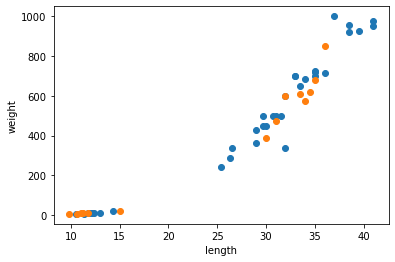

In [18]:
#잘 섞였는지 산점도로 그려봅니다. 
import matplotlib.pyplot as plt 

plt.scatter(train_input[:,0],train_input[:,1]) #x축이 길이, y축이 무게로 된 train_input 데이터 그려보기 
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#train과 test에 데이터가 잘 분포되어 있네요. 

### 학습시키기 
### knn알고리즘을 활용합니다. 

In [19]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [20]:
# 성능측정을 해보도록 하겠습니다. 
kn.score(test_input, test_target)

1.0

In [21]:
kn.predict(test_input)# test의 예측결과 출력
#넘파이 리스트를 반환합니다. 

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [22]:
test_target #test의 실제 결과 출력 

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])